In [2]:
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

In [3]:
from skimage.io import imread, imshow
from skimage.morphology import skeletonize, skeletonize_3d
import numpy as np
from microfilm.microplot import microshow

In [4]:
img = imread("Simonsen-mitome-deconv-plate01-batch1/Simonsen-mitome-deconv-plate01-batch1-02-tiff/composite_Simonsen-mitome-deconv-plate01-batch1-02--s444246--XWNeg9--W0077--P008--T00001--Z001--C01.ome.tif")
img = img[500:1500, 500:1500,:]

/home/marius/miniconda3/envs/img_env/lib/python3.12/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


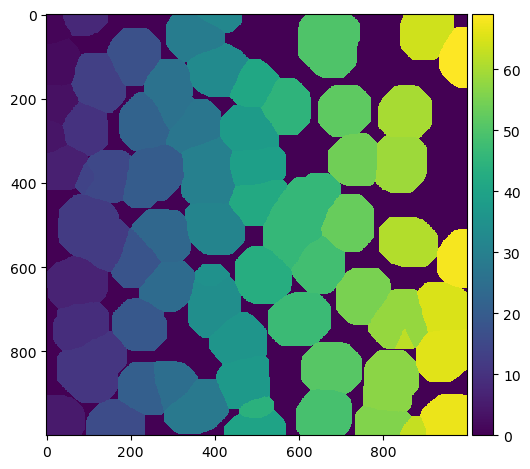

In [5]:
nuclei_channel = img[:,:,0]
sigma_outline = 1
nuclei_segmented = cle.gauss_otsu_labeling(nuclei_channel, outline_sigma=sigma_outline)
cell_regions = np.array(cle.dilate_labels(nuclei_segmented, radius=40))
imshow(cell_regions)

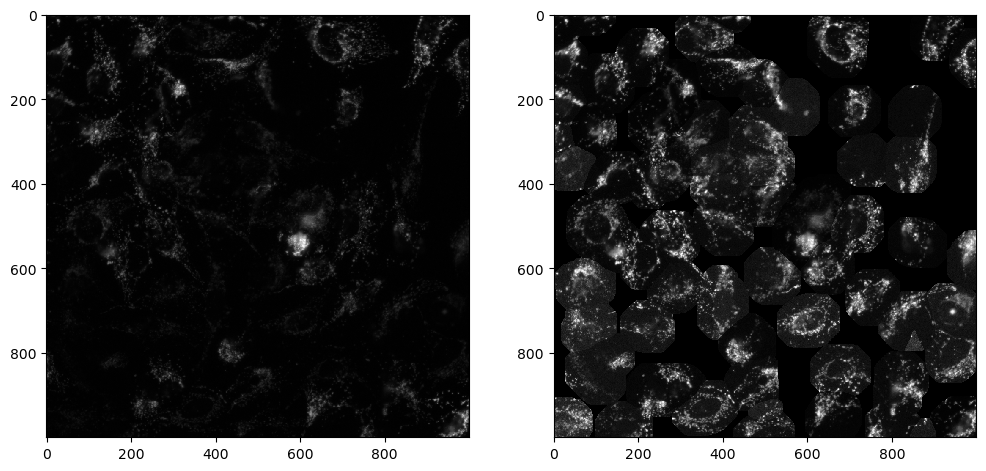

In [6]:
mito_channel =  img[:,:,1]
liso_channel =  img[:,:,2]
mito_normalized = np.array(cle.create_like(mito_channel))
labels = list(np.unique(cell_regions))
labels.remove(0)
for cellid in labels[:]:
    mask = cell_regions == cellid
    region = mito_channel[mask]
    mito_normalized[mask] =  region / region.max() * 256

fig, axs = plt.subplots(1, 2, figsize=(12, 12))
cle.imshow(mito_channel, labels=False, plot=axs[0])
cle.imshow(mito_normalized, labels=False, plot=axs[1])

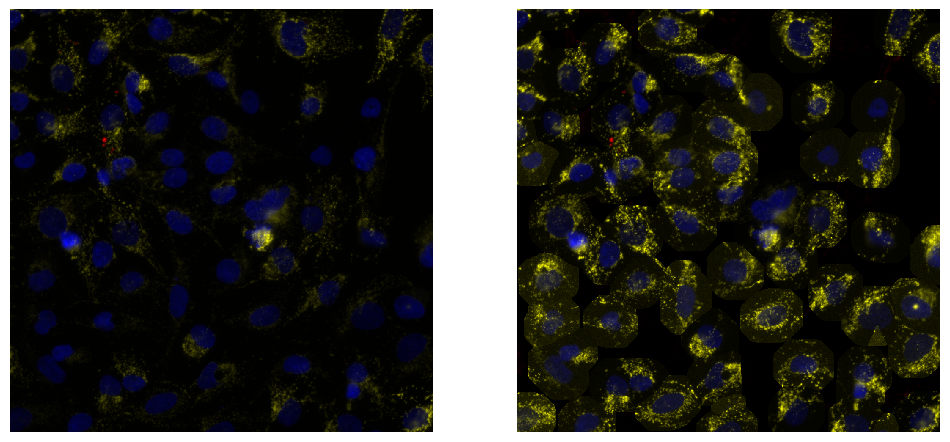

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 12))
normalized = np.dstack([nuclei_channel, mito_normalized, liso_channel])
microshow(np.rollaxis(img, axis=2), cmaps=['pure_blue', 'pure_yellow', 'pure_red'], ax=axs[0])
microshow(np.rollaxis(normalized, axis=2), cmaps=['pure_blue', 'pure_yellow', 'pure_red'], ax=axs[1])

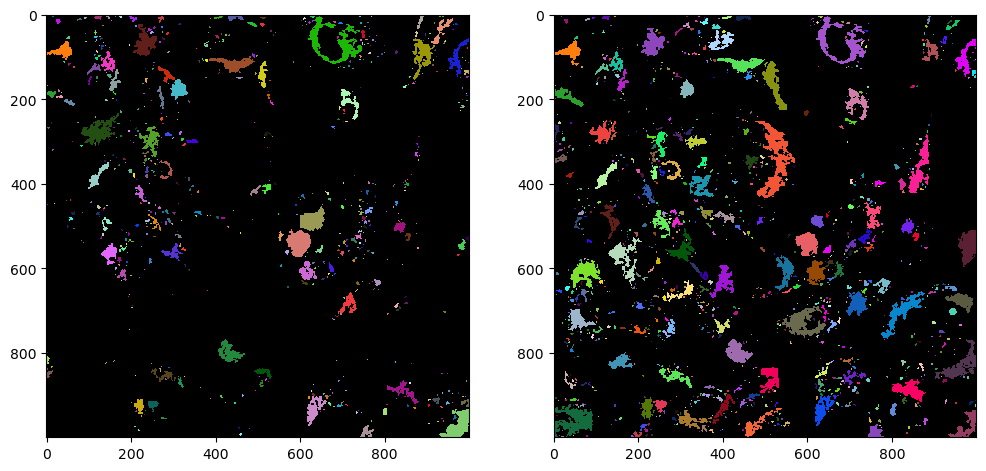

In [8]:
sigma_outline = 1
segmented = cle.gauss_otsu_labeling(mito_channel, outline_sigma=sigma_outline)
segmented_normalized = cle.gauss_otsu_labeling(mito_normalized, outline_sigma=sigma_outline)

fig, axs = plt.subplots(1, 2, figsize=(12, 12))
cle.imshow(segmented, labels=True, plot=axs[0])
cle.imshow(segmented_normalized, labels=True, plot=axs[1])

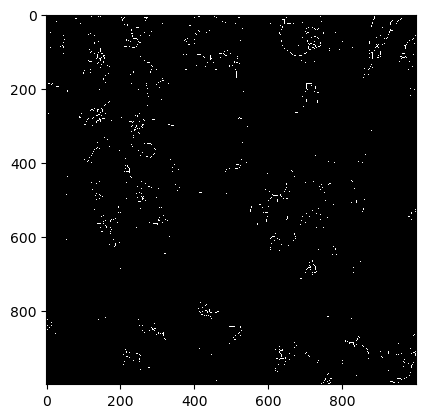

In [45]:
cle.imshow(skeletonize(np.array(segmented > 0)))